In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [2]:
tra1=pd.read_csv('train.csv')
tra1

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9248,Fiscal,2017,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2905,Senior Eligibility Worker,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,44541,Fiscal,2014,6,General Administration & Finance,ASR,ASR Assessor / Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",4200,...,4222,Sr Personal Property Auditor,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,47031,Fiscal,2014,3,Human Welfare & Neighborhood Development,DSS,HSA Human Services Agency,535,"SEIU - Human Services, Local 1021",2900,...,2910,Social Worker,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,139416,Fiscal,2014,1,Public Protection,FIR,FIR Fire Department,798,"Firefighters - Miscellaneous, Local 798",H000,...,H002,Firefighter,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,123780,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",1600,...,1224,Pr Payroll & Personnel Clerk,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149082,26258,Fiscal,2017,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21,"Prof & Tech Engineers - Miscellaneous, Local 21",5300,...,5304,Materials Testing Aide,14425,0.00,287.85,6785.08,8038.45,3022.34,17845.87,1
149083,13799,Fiscal,2014,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,253,"Transport Workers - Transit Operators, Local 2...",9100,...,9163,Transit Operator,18372,3238.18,3284.85,19683.92,13258.74,5617.78,38560.44,2
149084,204395,Fiscal,2015,4,Community Health,DPH,DPH Public Health,164,Physicians and Dentists - Miscellaneous,2200,...,2232,Senior Physician Specialist,22060,0.00,15231.00,25619.51,6226.78,9372.75,41219.04,3
149085,10829,Fiscal,2016,6,General Administration & Finance,REG,REG Elections,790,"SEIU - Miscellaneous, Local 1021",1400,...,1402,Junior Clerk,25607,696.47,0.00,0.00,355.17,142.58,497.75,1


In [3]:
tes1=pd.read_csv('test.csv')
tes1

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,"Lab, Pharmacy & Med Techs",2454,Clinical Pharmacist,23148,0.00,0.00,0.00,2203.32,2014.12,4217.44
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,8789,0.00,1689.53,31464.76,11872.83,9947.92,53285.51
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,Library Assistant,48290,0.00,932.77,8858.22,9705.96,3764.93,22329.11
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1824,Pr Administrative Analyst,43253,0.00,0.00,23955.61,11687.19,8880.83,44523.63
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,Human Services,2930,Psychiatric Social Worker,13722,0.00,620.54,20644.61,12384.59,7491.65,40520.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63890,8069,Fiscal,2014,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3602,Library Page,36930,0.00,509.23,5009.17,6228.39,1667.25,12904.81
63891,135014,Fiscal,2013,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8214,Parking Control Officer,40778,3383.01,581.73,10381.29,12828.16,4823.97,28033.42
63892,201280,Fiscal,2015,1,Public Protection,POL,POL Police,790,"SEIU - Miscellaneous, Local 1021",9200,Airport Operation,9209,Community Police Services Aide,39502,1600.51,5430.26,15582.25,12465.54,6107.96,34155.75
63893,116703,Fiscal,2016,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,253,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,9163,Transit Operator,2087,14319.71,1094.05,14314.94,14022.98,6492.42,34830.34


In [4]:
tes1.dtypes

ID                           int64
Year Type                   object
Year                         int64
Organization Group Code      int64
Organization Group          object
Department Code             object
Department                  object
Union Code                   int64
Union                       object
Job Family Code             object
Job Family                  object
Job Code                    object
Job                         object
Employee Identifier          int64
Overtime                   float64
Other Salaries             float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
dtype: object

In [5]:
tra1.dtypes

ID                           int64
Year Type                   object
Year                         int64
Organization Group Code      int64
Organization Group          object
Department Code             object
Department                  object
Union Code                   int64
Union                       object
Job Family Code             object
Job Family                  object
Job Code                    object
Job                         object
Employee Identifier          int64
Overtime                   float64
Other Salaries             float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
Class                        int64
dtype: object

In [6]:
tra2=tra1.drop(['ID', 'Year Type','Organization Group','Department','Union','Job Family','Job'], axis=1)
tra2.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,2017,3,DSS,535,2900,2905,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,2014,6,ASR,21,4200,4222,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,2014,3,DSS,535,2900,2910,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,2014,1,FIR,798,H000,H002,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,2013,2,MTA,790,1600,1224,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [7]:
tra2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,149087.0,2015.072018,1.410452,2013.00,2014.000,2015.00,2016.000,2017.00
Organization Group Code,149087.0,2.976980,1.582080,1.00,2.000,2.00,4.000,7.00
Union Code,149087.0,491.154963,333.914881,1.00,216.000,535.00,790.000,990.00
Employee Identifier,149087.0,28508.984465,16460.652590,1.00,14244.000,28520.00,42804.500,56987.00
Overtime,149087.0,4511.488439,11361.792998,-12308.66,0.000,0.00,2872.240,227313.62
Other Salaries,149087.0,3754.638895,7516.445237,-19131.10,0.000,698.35,4558.190,336726.34
Retirement,149087.0,12632.395320,9657.913757,-28723.19,3228.975,12839.71,19137.745,101306.01
Health/Dental,149087.0,9058.531893,5024.486147,-2946.53,4274.930,12137.40,12828.180,22052.15
Other Benefits,149087.0,4720.552627,3933.772085,-9857.74,1578.475,4395.51,6943.835,36815.39
Total Benefits,149087.0,26411.479840,16893.424789,-19814.44,9313.965,30311.56,38510.300,138503.52


In [8]:
#sns.pairplot(tra2, kind='kde',size=7,aspect=0.5)

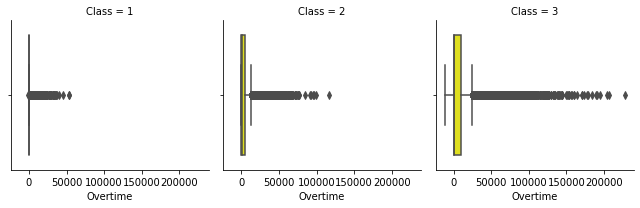

In [9]:
#tra2['Class'].value_counts().plot(kind='bar')

a = sns.FacetGrid(tra2, col='Class')
a.map(sns.boxplot, 'Overtime', color='yellow')
#class 3 does more overtime; then 2 n 1
#

In [10]:
tra2.corr()

,Year,Organization Group Code,Union Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
Year,1.000000,-0.004740,0.001289,0.000410,0.026987,-0.009350,0.001891,0.046810,0.055071,0.027827,0.023302
Organization Group Code,-0.004740,1.000000,-0.007327,-0.007359,-0.301712,-0.226052,-0.243119,-0.231393,0.022912,-0.202476,-0.223910
Union Code,0.001289,-0.007327,1.000000,0.003008,0.061510,0.167970,-0.079131,-0.083012,-0.285390,-0.136384,-0.088473
Employee Identifier,0.000410,-0.007359,0.003008,1.000000,0.003836,0.005241,0.002271,0.000527,-0.003688,0.000596,0.000043
Overtime,0.026987,-0.301712,0.061510,0.003836,1.000000,0.361632,0.314432,0.308647,0.061956,0.285985,0.288897
Other Salaries,-0.009350,-0.226052,0.167970,0.005241,0.361632,1.000000,0.349144,0.216293,0.054032,0.276517,0.317438
Retirement,0.001891,-0.243119,-0.079131,0.002271,0.314432,0.349144,1.000000,0.787526,0.671137,0.962205,0.872818
Health/Dental,0.046810,-0.231393,-0.083012,0.000527,0.308647,0.216293,0.787526,1.000000,0.606259,0.888821,0.798186
Other Benefits,0.055071,0.022912,-0.285390,-0.003688,0.061956,0.054032,0.671137,0.606259,1.000000,0.796860,0.657243
Total Benefits,0.027827,-0.202476,-0.136384,0.000596,0.285985,0.276517,0.962205,0.888821,0.796860,1.000000,0.889430


In [11]:
tra2.dtypes

Year                         int64
Organization Group Code      int64
Department Code             object
Union Code                   int64
Job Family Code             object
Job Code                    object
Employee Identifier          int64
Overtime                   float64
Other Salaries             float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
Class                        int64
dtype: object

In [12]:
#we have salary details for more than a lacs employees
#salary depends upon 

In [13]:
from sklearn import preprocessing as prep
le=prep.LabelEncoder()
tra2['Department Code']=le.fit_transform(tra2['Department Code'])
tra2['Job Family Code']=le.fit_transform(tra2['Job Family Code'])
tra2['Job Code']=le.fit_transform(tra2['Job Code'])

In [14]:
tra2['Job Family Code']=le.fit_transform(tra2['Job Family Code'])

In [15]:
tra2['Job Code']=le.fit_transform(tra2['Job Code'])

In [16]:
tra2.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,2017,3,22,535,18,373,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,2014,6,5,21,25,509,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,2014,3,22,535,18,377,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,2014,1,28,798,53,1096,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,2013,2,37,790,6,60,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [17]:
#df=tra2.drop((tra2['Overtime'].between(-51.33,0.0)), axis=1)
#not the right way. u can just slice. the above syntax will return only true and false
df=tra2.loc[tra2['Overtime']>=0]
df.head()

,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,2017,3,22,535,18,373,41351,0.00,240.00,11896.36,13765.55,5248.43,30910.34,2
1,2014,6,5,21,25,509,41792,0.00,400.00,15429.94,9337.37,5599.01,30366.32,2
2,2014,3,22,535,18,377,9357,0.00,1080.00,9682.00,8848.03,3463.92,21993.95,2
3,2014,1,28,798,53,1096,28022,25730.46,18414.18,24222.26,13911.13,2416.58,40549.97,3
4,2013,2,37,790,6,60,51052,1138.28,2148.11,15437.62,12828.15,7246.54,35512.31,3


In [18]:
df=tra2.loc[tra2['Other Salaries']>0]

In [19]:
df=tra2.loc[tra2['Retirement']>0]

In [20]:
df=tra2.loc[tra2['Health/Dental']>0]

In [21]:
df=tra2.loc[tra2['Other Benefits']>0]

In [22]:
df=tra2.loc[tra2['Total Benefits']>0]

In [23]:
from scipy.stats import zscore
df_z=df.apply(zscore)

In [24]:
#from sklearn import metrics
#from sklearn.cluster import KMeans

#cluster_range = range(25000, 75850) 
#cluster_errors = []
#cluster_sil_scores = []
#for cluster_num in cluster_range:
    #clusters = KMeans( cluster_num, n_init = 5)
    #model=clusters.fit(df_z)#First we need to
   # labels = clusters.labels_# capture the cluster lables
   # centroids = clusters.cluster_centers_ # capture the centroids
   # cluster_errors.append( model.inertia_ )# capture the intertia
  #  cluster_sil_scores.append(metrics.silhouette_score(df, labels, metric='euclidean'))
#clusters_df = pd.DataFrame( { "cluster_num":cluster_range, "cluster_errors": cluster_errors, "Avg Sil Score": cluster_sil_scores } )
#clusters_df 

In [25]:
#cluster = KMeans( n_clusters = 5000, random_state = 2 )
#cluster.fit(df)

In [26]:
#centroids = cluster.cluster_centers_
#centroids

In [27]:
#centroid_df = pd.DataFrame(centroids, columns = list(df) )
#centroid_df

In [24]:
#prediction=cluster.predict(car_df_z)
#df["group"] = prediction

#X = df.drop('status', axis=1)
X = tra2.drop('Class', axis=1)
y = tra2['Class']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.9, random_state=10)

In [73]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

In [74]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
accuracy_score(y_test, y_predict)

0.9843718559259508

In [67]:
#tes1
#tes1=tes1.drop(['ID', 'Year Type','Organization Group','Department','Union','Job Family','Job'], axis=1)
#tes1.head()

In [76]:
from sklearn import preprocessing as prep
le=prep.LabelEncoder()
tes1['Department Code']=le.fit_transform(tes1['Department Code'])
tes1['Job Family Code']=le.fit_transform(tes1['Job Family Code'])
tes1['Job Code']=le.fit_transform(tes1['Job Code'])

In [77]:
y_predict_tes = random_forest.predict(tes1)
#accuracy_score(y_test, y_predict)

In [78]:
X_train.columns

Index(['Year', 'Organization Group Code', 'Department Code', 'Union Code',
       'Job Family Code', 'Job Code', 'Employee Identifier', 'Overtime',
       'Other Salaries', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits'],
      dtype='object')

In [79]:
#tes1.drop(['Class'], inplace=True, axis=1)

In [80]:
y_predict_tes

array([1, 3, 2, ..., 2, 2, 3], dtype=int64)

In [37]:
df3=pd.read_csv('test.csv')

In [38]:
df3.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,"Lab, Pharmacy & Med Techs",2454,Clinical Pharmacist,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,Library,3610,Library Assistant,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,"Budget, Admn & Stats Analysis",1824,Pr Administrative Analyst,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,Human Services,2930,Psychiatric Social Worker,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85


In [39]:
df3['Class']=y_pred_gb

ValueError: Length of values does not match length of index

In [84]:
df2.head()

,ID,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
0,9240,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2400,...,2454,Clinical Pharmacist,23148,0.0,0.00,0.00,2203.32,2014.12,4217.44,1
1,209951,Fiscal,2016,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,...,2328,Nurse Practitioner,8789,0.0,1689.53,31464.76,11872.83,9947.92,53285.51,3
2,29879,Fiscal,2016,5,Culture & Recreation,LIB,LIB Public Library,790,"SEIU - Miscellaneous, Local 1021",3600,...,3610,Library Assistant,48290,0.0,932.77,8858.22,9705.96,3764.93,22329.11,2
3,177914,Fiscal,2015,1,Public Protection,POL,POL Police,21,"Prof & Tech Engineers - Miscellaneous, Local 21",1800,...,1824,Pr Administrative Analyst,43253,0.0,0.00,23955.61,11687.19,8880.83,44523.63,3
4,180406,Fiscal,2015,4,Community Health,DPH,DPH Public Health,790,"SEIU - Miscellaneous, Local 1021",2900,...,2930,Psychiatric Social Worker,13722,0.0,620.54,20644.61,12384.59,7491.65,40520.85,3


In [85]:
final=df2[['ID','Class']]

In [86]:
final.to_csv("Result4.csv")

In [25]:
#GRADIENT BOOSTING CLASSIFIER*********

from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gb=GradientBoostingClassifier(n_estimators=100, random_state=5)
gb=gb.fit(X_train, y_train)
y_pred_gb=gb.predict(X_test)
gb.score(X_test, y_test)

0.9773291300556711

In [36]:
y_pred_gb

array([1, 2, 3, ..., 1, 1, 3], dtype=int64)